In [335]:
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [336]:
df = pd.read_csv("GlobalProtestTracker.csv")

In [337]:
df.head(50)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)


In [338]:
 df.at[257, 'Coronavirus-related protests'] = 'X'

In [339]:
df.loc[df['Country'] == 'Serbia']

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city
256,Serbia,Environmental protest,Sep-21,Partly free,Call for protest by thirty environmental group...,Concerns over worsening pollution and the envi...,">1,000",General public.,4 months,The Serbian government announced that it would...,NaN,X,X,NaN,Thousands,X,NaN,NaN,X,NaN,Belgrade
257,Serbia,Coronavirus protests,Jul-20,Partly free,Announcement that the government would reimpos...,Public perceptions that President Aleksandar V...,">10,000",Opposition parties.,4 weeks,No policy/leadership change in response to the...,NaN,NaN,X,NaN,Hundreds,NaN,NaN,X,NaN,X,Belgrade
258,Serbia,“1 Out of 5 Million” protests,Dec-18,Free,"Violent attack on an opposition leader, and Pr...","Corruption, nepotism, government incompetence,...","37,500",Young people.,"1 year, 2 months",No policy/leadership change in response to the...,NaN,NaN,X,NaN,Thousands,NaN,NaN,X,NaN,NaN,Belgrade


In [340]:
df.loc[df['Coronavirus-related protests'] == 'X']

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city
3,Canada,Coronavirus restrictions protests,Apr-20,Free,"Enactment of coronavirus restrictions, includi...","Skepticism of coronavirus, vaccines, and conce...",">1,000",General public; truckers.,Active,No policy/leadership change in response to the...,X,X,NaN,X,Thousands,NaN,NaN,X,NaN,X,Ottawa
18,Afghanistan,Electoral protests,Nov-19,Not free,Delays in the announcement of final vote count...,Concerns about electoral fraud and controversy...,">1,000",Supporters of opposition presidential candidat...,2 months,No policy/leadership change in response to pro...,NaN,NaN,X,X,Thousands,NaN,NaN,NaN,NaN,X,Kabul
21,Albania,Police violence protests,Dec-20,Partly free,The fatal shooting of Klodian Rasha by an offi...,Concerns about excessive force being used by l...,>500,"General public, especially youth.",1 week,No policy/leadership change in response to pro...,NaN,NaN,X,NaN,Hundreds,NaN,NaN,X,NaN,X,Tirana
22,Albania,Local elections protests,Feb-19,Partly free,Suspicions that Prime Minister Edi Rama engage...,Electoral fraud and corruption.,">10,000",Opposition parties.,5 months,No policy/leadership change in response to the...,NaN,NaN,X,NaN,Thousands,X,NaN,NaN,NaN,X,Tirana
29,Australia,Coronavirus restriction protests,Jul-21,Free,The imposition of lockdowns and vaccine mandat...,Frustration with ongoing coronavirus restricti...,">4,000",General public.,8 months,No policy/leadership change in response to pro...,NaN,NaN,X,NaN,Thousands,NaN,NaN,NaN,X,X,Canberra
33,Austria,Coronavirus restriction protests,Nov-21,Free,The imposition of vaccine mandates and public ...,Frustration with ongoing coronavirus restricti...,">40,000","General public, especially unvaccinated popula...",5 months,No policy/leadership change in response to pro...,NaN,NaN,X,NaN,Tens of thousands,NaN,NaN,NaN,X,X,Vienna
34,Azerbaijan,Pro-war protest,Jul-20,Not free,Brief conflict with Armenia over the contested...,Anger over the government’s refusal to escalat...,">10,000",General public.,1 day,The Azerbaijani military initiated a campaign ...,NaN,NaN,X,NaN,Thousands,NaN,NaN,NaN,NaN,X,Baku
37,Bahrain,Political prisoner death protest,Jun-21,Not free,Death of political prisoner Husain Barakat fro...,Frustration over the detention of political pr...,>500,Residents of the town of Diah; general public.,1 day,No policy/leadership change in response to the...,NaN,NaN,X,NaN,Hundreds,NaN,NaN,NaN,NaN,X,Manama
38,Bangladesh,Garment worker protests,Jan-19,Partly free,Failure by garment industry employers to raise...,Economic inequality and low wages.,">10,000",Garment workers.,"1 year, intermittently",The government announced a pay raise for low-i...,NaN,NaN,X,NaN,Thousands,NaN,NaN,NaN,X,X,Dhaka
39,Bangladesh,Job quota protests,Feb-18,Partly free,The failure of the government to end quotas fo...,Frustration over lack of economic opportunity ...,">1,000","General public, especially those seeking work ...",5 months,The government agreed to a piecemeal plan to e...,NaN,NaN,X,NaN,Thousands,NaN,NaN,NaN,NaN,X,Dhaka


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Country                                   329 non-null    object
 1   Protest Name                              329 non-null    object
 2   Start Date                                329 non-null    object
 3   Freedom Rating (Status)                   329 non-null    object
 4   Triggers                                  329 non-null    object
 5   Motivations                               329 non-null    object
 6   Peak Size                                 329 non-null    object
 7   Key Participants                          328 non-null    object
 8   Duration                                  329 non-null    object
 9   Outcomes                                  328 non-null    object
 10  Active protests                           17 non-n

## Fix the time, and create a useful date time object

In [342]:
# Strip the start of year from column then add 20 to make it full year

df['year'] = df['Start Date'].str.strip().str[-2:]

In [343]:
df['year'] ='20' + df['year'].astype(str)

In [344]:
df.head()

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city,year
0,Argentina,Agricultural policy protests,Apr-22,Free,The government's adoption of interventionist p...,Frustration with high tax rates and persistent...,">1,000",Farmers.,Active,No policy/leadership change in response to pro...,X,X,X,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Buenos Aires,2022
1,Armenia,Peace plan protests,Nov-20,Partly free,Announcement of a Russian-brokered peace deal ...,Nationalist sentiment and a belief in Armenian...,">1,000",Coalition of seventeen opposition parties and ...,6 months in 2020–2021; Active as of May 2022,No policy or leadership change in response to ...,X,NaN,X,NaN,Thousands,NaN,NaN,NaN,X,NaN,Yerevan,2020
2,Brazil,Indigenous land rights protests,Jun-21,Free,President Jair Bolsonaro's administration's su...,Anger over economic exploitation of Indigenous...,">4,000",Indigenous groups.,Active,The Brazilian Supreme Court suspended the land...,X,NaN,X,NaN,Thousands,X,NaN,NaN,NaN,NaN,Brasilia,2021
3,Canada,Coronavirus restrictions protests,Apr-20,Free,"Enactment of coronavirus restrictions, includi...","Skepticism of coronavirus, vaccines, and conce...",">1,000",General public; truckers.,Active,No policy/leadership change in response to the...,X,X,NaN,X,Thousands,NaN,NaN,X,NaN,X,Ottawa,2020
4,Iran,Public sector employees protests,Jan-22,Not free,Rising costs of living and stagnating salaries...,Frustration with the government's slow impleme...,>1000,"Public sector employees, including nurses and ...",Active,No policy/leadership change in response to pro...,X,X,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Tehran,2022


In [345]:
# Select the month 
df['month'] = df['Start Date'].str.strip().str[:3:]


In [346]:
df['Month']=df['month']

In [347]:
df.head()

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city,year,month,Month
0,Argentina,Agricultural policy protests,Apr-22,Free,The government's adoption of interventionist p...,Frustration with high tax rates and persistent...,">1,000",Farmers.,Active,No policy/leadership change in response to pro...,X,X,X,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Buenos Aires,2022,Apr,Apr
1,Armenia,Peace plan protests,Nov-20,Partly free,Announcement of a Russian-brokered peace deal ...,Nationalist sentiment and a belief in Armenian...,">1,000",Coalition of seventeen opposition parties and ...,6 months in 2020–2021; Active as of May 2022,No policy or leadership change in response to ...,X,NaN,X,NaN,Thousands,NaN,NaN,NaN,X,NaN,Yerevan,2020,Nov,Nov
2,Brazil,Indigenous land rights protests,Jun-21,Free,President Jair Bolsonaro's administration's su...,Anger over economic exploitation of Indigenous...,">4,000",Indigenous groups.,Active,The Brazilian Supreme Court suspended the land...,X,NaN,X,NaN,Thousands,X,NaN,NaN,NaN,NaN,Brasilia,2021,Jun,Jun
3,Canada,Coronavirus restrictions protests,Apr-20,Free,"Enactment of coronavirus restrictions, includi...","Skepticism of coronavirus, vaccines, and conce...",">1,000",General public; truckers.,Active,No policy/leadership change in response to the...,X,X,NaN,X,Thousands,NaN,NaN,X,NaN,X,Ottawa,2020,Apr,Apr
4,Iran,Public sector employees protests,Jan-22,Not free,Rising costs of living and stagnating salaries...,Frustration with the government's slow impleme...,>1000,"Public sector employees, including nurses and ...",Active,No policy/leadership change in response to pro...,X,X,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Tehran,2022,Jan,Jan


In [348]:
# Now convert 3 code month into the number of month

d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

df.month = df.month.map(d)
    

In [349]:
df.rename(columns = {'month':'#Month'}, inplace = True)

In [350]:
df['Date']=pd.to_datetime(df['#Month'].astype(str) + df['year'].astype(str),format="%m%Y")

## Feature engineering, convert X's to binary columns 

In [351]:
df["Active protests"].replace({"X": "1", "Unknown": "0"}, inplace=True)

In [352]:
df["Economic motivation?"].replace({"X": "1", "Unknown": "0"}, inplace=True)

In [353]:
df["Political motivation?"].replace({"X": "1", "Unknown": "0"}, inplace=True)

In [354]:
df["Corruption motivation?"].replace({"X": "1", "Unknown": "0"}, inplace=True)

In [355]:
df["Protests with a significant outcome"].replace({"X": "1", "Unknown": "0"}, inplace=True)

In [356]:
df["Large protests (Over 100,000 protesting)"].replace({"X": "1", "Unknown": "0"}, inplace=True)

In [357]:
df["Protests with a significant outcome"].replace({"X": "1", "Unknown": "0"}, inplace=True)

In [358]:
df["Violent government response"].replace({"X": "1", "Unknown": "0"}, inplace=True)

In [359]:
df["Long protests (more than 3 months)"].replace({"X": "1", "Unknown": "0"}, inplace=True)

In [360]:
df["Coronavirus-related protests"].replace({"X": "1", "Unknown": "0"}, inplace=True)

In [361]:
df=df.replace(np.nan, 0)

In [362]:
df.head(29)

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city,year,#Month,Month,Date
0,Argentina,Agricultural policy protests,Apr-22,Free,The government's adoption of interventionist p...,Frustration with high tax rates and persistent...,">1,000",Farmers.,Active,No policy/leadership change in response to pro...,1,1,1,0,Thousands,0,0,0,0,0,Buenos Aires,2022,4,Apr,2022-04-01
1,Armenia,Peace plan protests,Nov-20,Partly free,Announcement of a Russian-brokered peace deal ...,Nationalist sentiment and a belief in Armenian...,">1,000",Coalition of seventeen opposition parties and ...,6 months in 2020–2021; Active as of May 2022,No policy or leadership change in response to ...,1,0,1,0,Thousands,0,0,0,1,0,Yerevan,2020,11,Nov,2020-11-01
2,Brazil,Indigenous land rights protests,Jun-21,Free,President Jair Bolsonaro's administration's su...,Anger over economic exploitation of Indigenous...,">4,000",Indigenous groups.,Active,The Brazilian Supreme Court suspended the land...,1,0,1,0,Thousands,1,0,0,0,0,Brasilia,2021,6,Jun,2021-06-01
3,Canada,Coronavirus restrictions protests,Apr-20,Free,"Enactment of coronavirus restrictions, includi...","Skepticism of coronavirus, vaccines, and conce...",">1,000",General public; truckers.,Active,No policy/leadership change in response to the...,1,1,0,1,Thousands,0,0,1,0,1,Ottawa,2020,4,Apr,2020-04-01
4,Iran,Public sector employees protests,Jan-22,Not free,Rising costs of living and stagnating salaries...,Frustration with the government's slow impleme...,>1000,"Public sector employees, including nurses and ...",Active,No policy/leadership change in response to pro...,1,1,0,0,Thousands,0,0,0,0,0,Tehran,2022,1,Jan,2022-01-01
5,Iraq,Iraq protests,Oct-19,Not free,Demotion of a popular counterterrorism leader ...,"Inadequate public services, government corrupt...",">10,000","Young people (especially young men), universit...",Active,Adel Abdul-Mahdi resigned as prime minister bu...,1,1,1,1,Tens of thousands,1,0,1,1,0,Baghdad,2019,10,Oct,2019-10-01
6,Israel,Palestinian protests,May-21,Free,A forthcoming court decision on whether to evi...,Ongoing tensions over the fate of East Jerusal...,">100,000",Palestinians.,Active,The Supreme Court delayed its ruling in the case.,1,0,1,0,Hundreds of thousands,1,1,1,0,0,Jerusalem,2021,5,May,2021-05-01
7,Lebanon,October Movement,Oct-19,Partly free,"Introduction of taxes on tobacco, petrol, and ...","High youth unemployment and a currency crisis,...",">1,000,000",General public.,Active,"In October 2019, the government of Prime Minis...",1,1,1,1,Over 1 million,1,1,1,1,0,Beirut,2019,10,Oct,2019-10-01
8,Morocco,Rising cost of living protests,Feb-22,Partly free,"Increasing prices of basic goods, including gr...",Frustration at inflation and the perception th...,">1,000",General public.,Active,The government acknowledged that its policies ...,1,1,1,0,Thousands,0,0,0,0,0,Rabat,2022,2,Feb,2022-02-01
9,Myanmar,Coup protests,Feb-21,Not free,The February 1 coup d'etat orchestrated by the...,Opposition to military rule and its rejection ...,">100,000",General public.,Active,No policy/leadership change in response to the...,1,0,1,0,Hundreds of thousands,0,1,1,1,0,Naypyidaw,2021,2,Feb,2021-02-01


In [363]:
#Change peak size to continuous numeric data 

df['Peak Size'] = df['Peak Size'].str.replace(">","")
df['Peak Size'] = df['Peak Size'].str.replace("<","")
df['Peak Size'] = df['Peak Size'].str.replace(",","")
df.head()

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city,year,#Month,Month,Date
0,Argentina,Agricultural policy protests,Apr-22,Free,The government's adoption of interventionist p...,Frustration with high tax rates and persistent...,1000,Farmers.,Active,No policy/leadership change in response to pro...,1,1,1,0,Thousands,0,0,0,0,0,Buenos Aires,2022,4,Apr,2022-04-01
1,Armenia,Peace plan protests,Nov-20,Partly free,Announcement of a Russian-brokered peace deal ...,Nationalist sentiment and a belief in Armenian...,1000,Coalition of seventeen opposition parties and ...,6 months in 2020–2021; Active as of May 2022,No policy or leadership change in response to ...,1,0,1,0,Thousands,0,0,0,1,0,Yerevan,2020,11,Nov,2020-11-01
2,Brazil,Indigenous land rights protests,Jun-21,Free,President Jair Bolsonaro's administration's su...,Anger over economic exploitation of Indigenous...,4000,Indigenous groups.,Active,The Brazilian Supreme Court suspended the land...,1,0,1,0,Thousands,1,0,0,0,0,Brasilia,2021,6,Jun,2021-06-01
3,Canada,Coronavirus restrictions protests,Apr-20,Free,"Enactment of coronavirus restrictions, includi...","Skepticism of coronavirus, vaccines, and conce...",1000,General public; truckers.,Active,No policy/leadership change in response to the...,1,1,0,1,Thousands,0,0,1,0,1,Ottawa,2020,4,Apr,2020-04-01
4,Iran,Public sector employees protests,Jan-22,Not free,Rising costs of living and stagnating salaries...,Frustration with the government's slow impleme...,1000,"Public sector employees, including nurses and ...",Active,No policy/leadership change in response to pro...,1,1,0,0,Thousands,0,0,0,0,0,Tehran,2022,1,Jan,2022-01-01


In [364]:
df["Peak Size"].value_counts()

1000                 109
10000                 69
5000                  26
100000                23
500                   19
20000                  9
4000                   6
30000                  6
50000                  6
1000000                6
2000                   4
200000                 4
Unknown                3
800000                 3
60000                  3
40000                  2
500000                 2
100                    2
22000                  2
15000                  2
400                    1
250000                 1
300000                 1
150000                 1
120000                 1
1500000                1
Tens of thousands      1
300                    1
62500                  1
12500                  1
37500                  1
65000                  1
600000                 1
3000                   1
2500                   1
18000                  1
2000000                1
75000                  1
Thousands              1
700                    1


In [365]:
df['Peak Size'] = df['Peak Size'].str.replace(",","")
df['Peak Size'] = df['Peak Size'].str.replace("1.5 million","1500000")
df['Peak Size'] = df['Peak Size'].str.replace("1 million","100000")

<ipython-input-365-d0eda296f328>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Peak Size'] = df['Peak Size'].str.replace("1.5 million","1500000")


In [366]:
# still need to drop text parts, unknown, tens of thousands, thousands 
df["Peak Size"].value_counts()

1000                 109
10000                 69
5000                  26
100000                24
500                   19
20000                  9
50000                  6
30000                  6
4000                   6
1000000                6
200000                 4
2000                   4
Unknown                3
60000                  3
800000                 3
15000                  2
500000                 2
1500000                2
100                    2
22000                  2
40000                  2
250000                 1
300000                 1
400                    1
150000                 1
120000                 1
Tens of thousands      1
300                    1
12500                  1
37500                  1
65000                  1
600000                 1
62500                  1
3000                   1
2500                   1
18000                  1
2000000                1
75000                  1
Thousands              1
700                    1


In [367]:
# ~ omits data from the df

df = df[~df['Peak Size'].isin(['Unknown', 'Tens of thousands','Thousands'])]


In [368]:
df["Peak Size"].value_counts()
# Fixed 

1000       109
10000       69
5000        26
100000      24
500         19
20000        9
4000         6
1000000      6
30000        6
50000        6
2000         4
200000       4
60000        3
800000       3
1500000      2
40000        2
100          2
500000       2
22000        2
15000        2
300          1
300000       1
250000       1
12500        1
400          1
62500        1
37500        1
65000        1
600000       1
120000       1
3000         1
2500         1
18000        1
2000000      1
75000        1
12000        1
700          1
150000       1
Name: Peak Size, dtype: int64

## Convert columns from object to numeric 

In [369]:
df[["Peak Size", "Active protests", "Economic motivation?", "Political motivation?", "Corruption motivation?","Protests with a significant outcome","Large protests (Over 100,000 protesting)","Coronavirus-related protests","#Month", "year", "Long protests (more than 3 months)","Violent government response"]] = df[["Peak Size", "Active protests", "Economic motivation?", "Political motivation?", "Corruption motivation?","Protests with a significant outcome","Large protests (Over 100,000 protesting)","Coronavirus-related protests","#Month","year", "Long protests (more than 3 months)","Violent government response"]].apply(pd.to_numeric)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 328
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Country                                   324 non-null    object        
 1   Protest Name                              324 non-null    object        
 2   Start Date                                324 non-null    object        
 3   Freedom Rating (Status)                   324 non-null    object        
 4   Triggers                                  324 non-null    object        
 5   Motivations                               324 non-null    object        
 6   Peak Size                                 324 non-null    int64         
 7   Key Participants                          324 non-null    object        
 8   Duration                                  324 non-null    object        
 9   Outcomes                        

In [371]:
# Deal with this, there are 3 hundreds of thousands categories 
df['Size category'].value_counts()

Thousands                   149
Tens of thousands            96
Hundreds of thousands        31
Hundreds                     26
Over 1 million                7
Hundreds of of thousands      6
Unknown                       3
Thosuands                     2
Millions                      2
Tens of millions              1
Huundreds of thousands        1
Name: Size category, dtype: int64

In [372]:
df['Size category'] = df['Size category'].str.replace("Huundreds of thousands","Hundreds of thousands")
df['Size category'] = df['Size category'].str.replace("Hundreds of of thousands","Hundreds of thousands")
df['Size category'] = df['Size category'].str.replace("Tens of millions","Over 1 million")
df['Size category'] = df['Size category'].str.replace("Millions","Over 1 million")
df['Size category'] = df['Size category'].str.replace("Thosuands","Thousands")

In [373]:
# Drop rows with unknown 

df=df[df['Size category'].str.contains('Unknown')==False]

In [374]:
df['Size category'].value_counts()
# now this column is clean 

Thousands                151
Tens of thousands         96
Hundreds of thousands     38
Hundreds                  26
Over 1 million            10
Name: Size category, dtype: int64

In [375]:
df['Freedom Rating (Status)'] = df['Freedom Rating (Status)'].str.replace("Partly freee","Partly free")


In [376]:
len(df['Key Participants'].value_counts())
# too many to deal with for this purpose 

173

In [377]:
len(df['Duration'].value_counts())
# too many to deal with for this purpose 

47

In [378]:
df['Duration'].value_counts()

1 day                                                    53
1 week                                                   50
1 month                                                  42
2 months                                                 31
Active                                                   16
4 months                                                 15
2 weeks                                                  15
3 months                                                 10
5 months                                                 10
3 weeks                                                   9
14 months                                                 6
8 months                                                  5
6 months                                                  4
3 days                                                    4
1 year                                                    4
1 year, 6 months                                          3
2 days                                  

In [379]:
#Remove unwanted strings 

ids = {',': '', 'intermittently': '', ' in August 2021; 1 week in December 2021': '', '(sporadic)': '', '3 weeks in July 2021; November 2021 to February 2022. ':'4 months',' in 2020–2021; Active as of May 2022':'',' in March 2020; 1 day in March 2022.':'',' (first round); 2 months (second wave)':'','3 weeks in July 2021; November 2021 to February 2022.':'3 months'}

for old, new in ids.items():
    df['Duration'] = df['Duration'].str.replace(old, new, regex=False)

In [380]:
df = df[~df['Peak Size'].isin(['Unknown', 'Tens of thousands','Thousands'])]

## Data exploration and visualization 

In [381]:
#Which cities had most protests 
df['Capital city'].value_counts()

Paris                                11
New Delhi                             9
Islamabad                             8
Washington, D.C.                      8
Ankara                                7
Moscow                                7
Tehran                                6
Dhaka                                 6
Tbilisi                               6
Warsaw                                5
Buenos Aires                          5
Lima                                  5
Addis Ababa                           4
Athens                                4
Brasilia                              4
La Paz                                4
Mbabane                               4
Bogota                                4
Canberra                              4
Jerusalem                             4
Khartoum                              4
Podgorica                             4
Rabat                                 4
Madrid                                4
Bishkek                               4


In [382]:
df[df['Size category']== "Over 1 million"]

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city,year,#Month,Month,Date
7,Lebanon,October Movement,Oct-19,Partly free,"Introduction of taxes on tobacco, petrol, and ...","High youth unemployment and a currency crisis,...",1000000,General public.,Active,"In October 2019, the government of Prime Minis...",1,1,1,1,Over 1 million,1,1,1,1,0,Beirut,2019,10,Oct,2019-10-01
19,Afghanistan,“Commander Sword” protests,Nov-18,Not free,The arrest of a popular ethnic Hazara militia ...,Conflict between the national government and e...,1000,Ethnic Hazaras.,1 week,The arrested commander was released after two ...,0,1,1,1,Over 1 million,1,1,0,1,0,Kabul,2018,11,Nov,2018-11-01
23,Algeria,Protests against “Le Pouvoir”,Feb-19,Not free,Then president Abdelaziz Bouteflika’s decision...,"Economic downturn, corruption and nepotism, an...",1000000,Opposition parties; a wide range of everyday c...,1 year,Bouteflika resigned. Military and political el...,0,1,1,1,Over 1 million,1,1,0,1,0,Algiers,2019,2,Feb,2019-02-01
35,Azerbaijan,Anticorruption protest,Oct-17,Not free,The detention of six opposition activists.,"Frustration over rampant official corruption, ...",1000,Supporters of the National Council of Democrat...,1 day,No policy/leadership change in response to pro...,0,0,1,0,Over 1 million,0,1,0,0,0,Baku,2017,10,Oct,2017-10-01
50,Benin,Election protests,Mar-19,Free,Exclusion of five opposition parties from legi...,Growing authoritarianism and crackdown on poli...,1000,Political supporters of former president Thoma...,4 months,No policy/leadership change in response to the...,0,1,1,1,Over 1 million,0,1,1,1,0,Porto-Novo,2019,3,Mar,2019-03-01
69,Chile,Subway fare protests,Oct-19,Free,Increased price of metro fares.,"Severe inequality, low wages and pensions, poo...",1000000,"Students, young people, professionals, civil s...",14 months,"The subway fare hike was reversed, and legisla...",0,1,1,1,Over 1 million,1,1,1,1,0,Santiago,2019,10,Oct,2019-10-01
99,eSwatini,Service delivery protest,Jun-18,Not free,The suspension of parliament and the introduct...,"Anger over corruption, misuse of state funds, ...",1000,General public.,1 day,No policy/leadership change in response to pro...,0,0,1,0,Over 1 million,1,1,1,1,0,Mbabane,2018,6,Jun,2018-06-01
150,India,Farm bill protests,Sep-20,Partly free,Passage of bills on agricultural market reform...,"Disruption of the rural farm economy, which ha...",1000000,Farmers.,15 months,"In November 2021, Prime Minister Narendra Modi...",0,1,0,0,Over 1 million,1,1,0,1,0,New Delhi,2020,9,Sep,2020-09-01
207,Montenegro,“Religion law” protests,Dec-19,Partly free,Passage of a law that would mandate the creati...,Concerns among supporters of the Serbian Ortho...,60000,"Teachers, teachers’ unions.",4 months,No policy/leadership change in response to the...,0,0,1,0,Over 1 million,0,1,0,1,0,Podgorica,2019,12,Dec,2019-12-01
309,United States,Police brutality protests,May-20,Free,Excessive use of lethal force by police office...,Ongoing police brutality toward communities of...,1000000,General public.,15 months,Multiple local governments have reduced fundin...,0,0,1,0,Over 1 million,1,1,1,1,0,"Washington, D.C.",2020,5,May,2020-05-01


In [383]:
df[df['Size category']== 'Hundreds of thousands']

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city,year,#Month,Month,Date
6,Israel,Palestinian protests,May-21,Free,A forthcoming court decision on whether to evi...,Ongoing tensions over the fate of East Jerusal...,100000,Palestinians.,Active,The Supreme Court delayed its ruling in the case.,1,0,1,0,Hundreds of thousands,1,1,1,0,0,Jerusalem,2021,5,May,2021-05-01
9,Myanmar,Coup protests,Feb-21,Not free,The February 1 coup d'etat orchestrated by the...,Opposition to military rule and its rejection ...,100000,General public.,Active,No policy/leadership change in response to the...,1,0,1,0,Hundreds of thousands,0,1,1,1,0,Naypyidaw,2021,2,Feb,2021-02-01
14,Sudan,“Million-man March”,Jun-20,Not free,Slow transition from military elite control to...,Discontent with the military elite’s continued...,100000,"General public, professional organizations, re...",Active,Bashir and more than twenty former officials a...,1,1,1,0,Hundreds of thousands,1,1,1,1,0,Khartoum,2020,6,Jun,2020-06-01
25,Argentina,Coronavirus lockdown and judicial reform protests,Aug-20,Free,Announcement of continued lockdown measures an...,Resistance to stringent COVID lockdown measure...,5000,General public; supporters of the former Macri...,2 days,No policy/leadership change in response to the...,0,0,1,1,Hundreds of thousands,1,1,0,0,0,Buenos Aires,2020,8,Aug,2020-08-01
41,Bangladesh,Blasphemy protests,Oct-19,Partly free,Circulation of a social media post that allege...,Anger over secularism and blasphemy in Banglad...,10000,Muslims.,1 week,No policy/leadership change in response to pro...,0,1,0,0,Hundreds of thousands,0,1,0,1,0,Dhaka,2019,10,Oct,2019-10-01
45,Belarus,“Slipper uprising”,Jun-20,Not free,Arrests of opposition presidential candidates;...,Opposition to President Alexander Lukashenko’s...,100000,General public.,11 months,No policy/leadership change in response to the...,0,0,1,0,Hundreds of thousands,0,1,1,1,0,Minsk,2020,6,Jun,2020-06-01
55,Bosnia and Herzegovina,“Justice for David” protests,Mar-18,Partly free,Suspicious death of a young man named David Dr...,"Impunity, weak rule of law, and corruption.",10000,Bosnian Serbs.,9 months,No policy/leadership change in response to the...,0,0,1,1,Hundreds of thousands,0,1,0,1,0,Sarajevo,2018,3,Mar,2018-03-01
75,Comoros,Electoral protests,Mar-19,Partly free,Allegations of ballot stuffing and the imprope...,Concerns about the lack of electoral integrity...,1000,"General public, especially supporters of the p...",1 week,No policy/leadership change in response to pro...,0,1,1,0,Hundreds of thousands,0,1,0,0,0,Moroni,2019,3,Mar,2019-03-01
76,Comoros,Constitutional reform protests,Jun-18,Partly free,Introduction of proposed constitutional reform...,Concern over the entrenchment of President Aza...,500,General public.,4 months,No policy/leadership change in response to pro...,0,1,1,0,Hundreds of thousands,1,1,1,1,0,Moroni,2018,6,Jun,2018-06-01
77,Comoros,Mayotte protests,Apr-18,Partly free,The expulsion of Comorian migrants in the Fren...,Nationalism rooted in a widespread belief in C...,1000,General public.,1 month,No policy/leadership change in response to pro...,0,1,0,0,Hundreds of thousands,0,1,0,0,0,Moroni,2018,4,Apr,2018-04-01


<AxesSubplot:xlabel='Protests with a significant outcome', ylabel='count'>

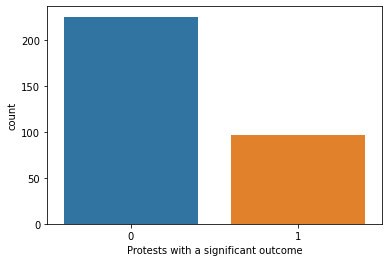

In [384]:
sns.countplot(x='Protests with a significant outcome',data=df)

<AxesSubplot:xlabel='Size category', ylabel='count'>

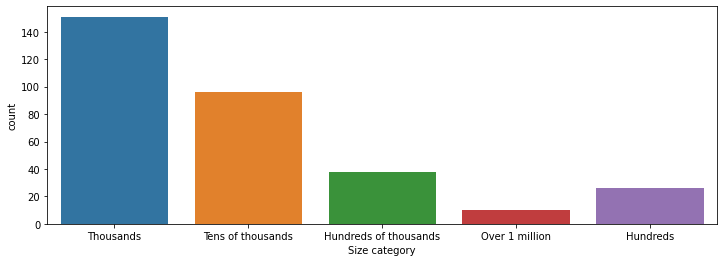

In [385]:
plt.figure(figsize=(12,4))
sns.countplot(x='Size category',data=df)

<AxesSubplot:xlabel='Freedom Rating (Status)', ylabel='count'>

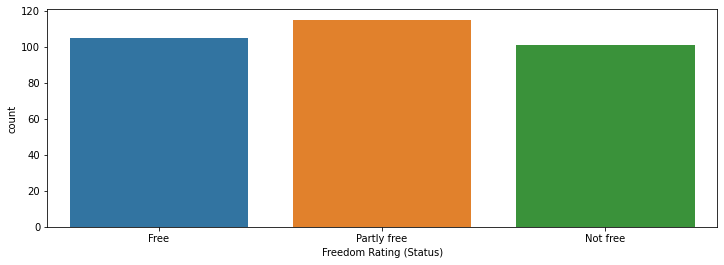

In [386]:
plt.figure(figsize=(12,4))
sns.countplot(x='Freedom Rating (Status)',data=df)

In [387]:
df.corr()

,Peak Size,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,year,#Month
Peak Size,1.000000,0.015311,-0.004696,0.018431,-0.016816,0.139555,0.133753,0.029212,0.051292,-0.032975,-0.173403,0.090145
Active protests,0.015311,1.000000,0.173318,0.011323,0.019303,0.058209,0.051863,0.041772,0.121019,-0.057016,0.227835,-0.090230
Economic motivation?,-0.004696,0.173318,1.000000,-0.415289,0.112031,0.126634,0.147973,0.025504,0.144304,-0.061988,0.052377,0.038967
Political motivation?,0.018431,0.011323,-0.415289,1.000000,-0.052185,-0.122660,0.042822,0.057167,-0.005994,0.108644,0.156090,-0.059377
Corruption motivation?,-0.016816,0.019303,0.112031,-0.052185,1.000000,0.161880,0.125602,-0.048995,0.157721,-0.006961,-0.136281,-0.016070
Protests with a significant outcome,0.139555,0.058209,0.126634,-0.122660,0.161880,1.000000,0.113456,0.056166,0.127015,-0.072958,-0.170684,0.040323
"Large protests (Over 100,000 protesting)",0.133753,0.051863,0.147973,0.042822,0.125602,0.113456,1.000000,0.101931,0.388046,-0.126640,-0.144947,-0.009098
Violent government response,0.029212,0.041772,0.025504,0.057167,-0.048995,0.056166,0.101931,1.000000,0.162554,-0.131759,-0.034292,0.009914
Long protests (more than 3 months),0.051292,0.121019,0.144304,-0.005994,0.157721,0.127015,0.388046,0.162554,1.000000,0.072677,-0.039159,-0.028499
Coronavirus-related protests,-0.032975,-0.057016,-0.061988,0.108644,-0.006961,-0.072958,-0.126640,-0.131759,0.072677,1.000000,0.130084,-0.110693


(10.0, 0.0)

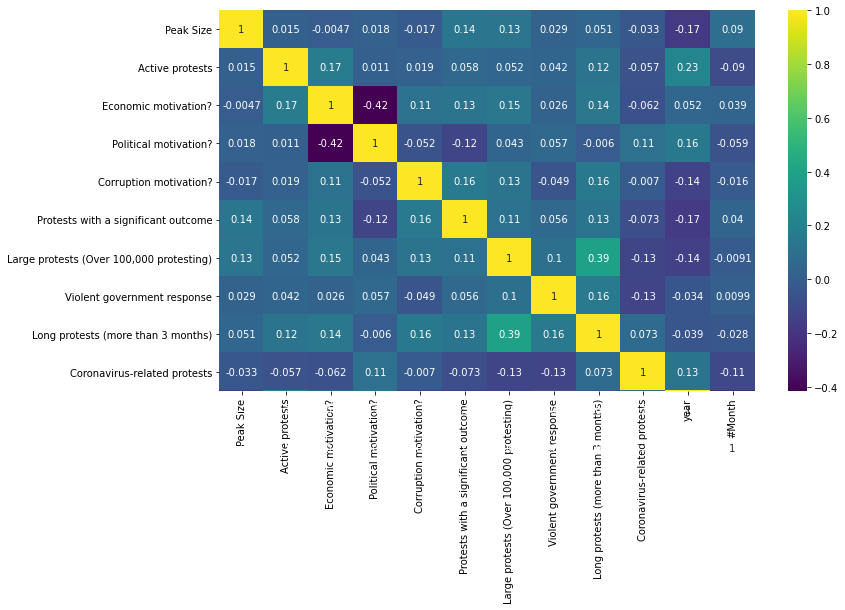

In [388]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

In [389]:
df.groupby('Protests with a significant outcome')['Corruption motivation?'].describe()

,count,mean,std,min,25%,50%,75%,max
Protests with a significant outcome,,,,,,,,
0,225.0,0.160000,0.367423,0.0,0.0,0.0,0.0,1.0
1,96.0,0.302083,0.461571,0.0,0.0,0.0,1.0,1.0


<AxesSubplot:xlabel='year', ylabel='count'>

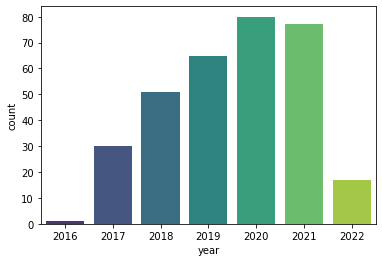

In [390]:
sns.countplot(x='year',data=df,palette='viridis')

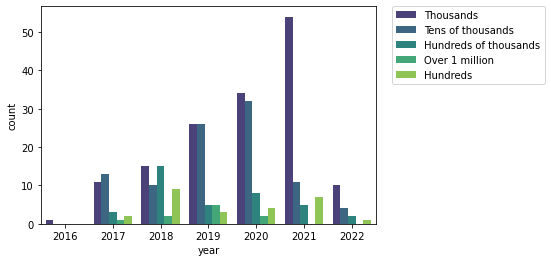

In [391]:
sns.countplot(x='year',data=df, hue='Size category',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [392]:
# Discontent seems to be building 

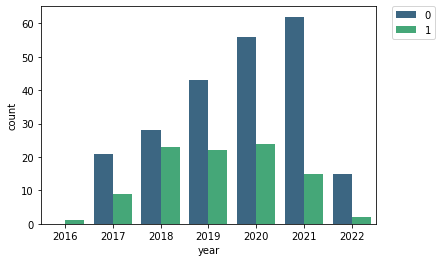

In [393]:
sns.countplot(x='year',data=df, hue='Protests with a significant outcome',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

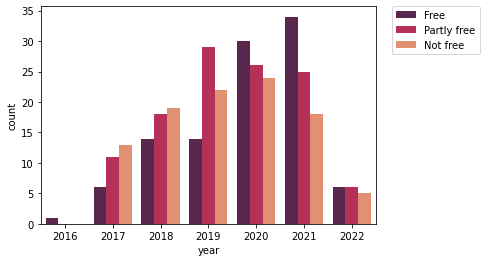

In [394]:
sns.countplot(x='year',data=df, hue='Freedom Rating (Status)',palette='rocket')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Create a df of numeric data for modelling, create dummy variables

In [395]:
len(df['Key Participants'].value_counts())

173

In [396]:
len(df['Capital city'].value_counts())
# removed from model after testing 

126

In [397]:
# Drop object columns 

In [399]:
df = df.drop(['Country', 'Protest Name', 'Start Date', 'Triggers', 'Motivations', 'Key Participants', 'Outcomes','Month','Date','Capital city' ], axis=1)

In [401]:
df.head()

,Freedom Rating (Status),Peak Size,Duration,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,year,#Month
0,Free,1000,Active,1,1,1,0,Thousands,0,0,0,0,0,2022,4
1,Partly free,1000,6 months,1,0,1,0,Thousands,0,0,0,1,0,2020,11
2,Free,4000,Active,1,0,1,0,Thousands,1,0,0,0,0,2021,6
3,Free,1000,Active,1,1,0,1,Thousands,0,0,1,0,1,2020,4
4,Not free,1000,Active,1,1,0,0,Thousands,0,0,0,0,0,2022,1


### Create dummy variables and concatenate


In [402]:
dummies = pd.get_dummies(df[['Freedom Rating (Status)', 'Duration','Size category']],drop_first=True)
df = df.drop(['Freedom Rating (Status)', 'Duration','Size category'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 328
Data columns (total 57 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Peak Size                                 321 non-null    int64
 1   Active protests                           321 non-null    int64
 2   Economic motivation?                      321 non-null    int64
 3   Political motivation?                     321 non-null    int64
 4   Corruption motivation?                    321 non-null    int64
 5   Protests with a significant outcome       321 non-null    int64
 6   Large protests (Over 100,000 protesting)  321 non-null    int64
 7   Violent government response               321 non-null    int64
 8   Long protests (more than 3 months)        321 non-null    int64
 9   Coronavirus-related protests              321 non-null    int64
 10  year                                      321 non-null    int6

## Train Test Split


In [404]:
from sklearn.model_selection import train_test_split

In [405]:
X = df.drop('Protests with a significant outcome',axis=1).values
y = df['Protests with a significant outcome'].values

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [407]:
# Normalize data 
from sklearn.preprocessing import MinMaxScaler

In [408]:
scaler = MinMaxScaler()

In [409]:
X_train = scaler.fit_transform(X_train)

In [410]:
X_test = scaler.transform(X_test)

## Create model


In [411]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [412]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [413]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1/1 [==============================] - 1s 573ms/step - loss: 0.7577 - val_loss: 0.7406
Epoch 2/25
1/1 [==============================] - 0s 21ms/step - loss: 0.7465 - val_loss: 0.7286
Epoch 3/25
1/1 [==============================] - 0s 22ms/step - loss: 0.7393 - val_loss: 0.7186
Epoch 4/25
1/1 [==============================] - 0s 20ms/step - loss: 0.7269 - val_loss: 0.7096
Epoch 5/25
1/1 [==============================] - 0s 21ms/step - loss: 0.7160 - val_loss: 0.7023
Epoch 6/25
1/1 [==============================] - 0s 20ms/step - loss: 0.7155 - val_loss: 0.6961
Epoch 7/25
1/1 [==============================] - 0s 20ms/step - loss: 0.7039 - val_loss: 0.6908
Epoch 8/25
1/1 [==============================] - 0s 22ms/step - loss: 0.6950 - val_loss: 0.6864
Epoch 9/25
1/1 [==============================] - 0s 21ms/step - loss: 0.6942 - val_loss: 0.6825
Epoch 10/25
1/1 [==============================] - 0s 22ms/step - loss: 0.6850 - val_loss: 0.6786
Epoch 11/25
1/1 [===========

In [414]:
from tensorflow.keras.models import load_model

In [415]:
model.save('protests.h5')  

In [416]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

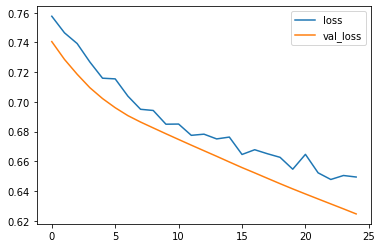

In [417]:
losses[['loss','val_loss']].plot()

In [418]:
from sklearn.metrics import classification_report,confusion_matrix

In [419]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3/3 [==============================] - 0s 1ms/step


In [420]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        48
           1       0.00      0.00      0.00        17

    accuracy                           0.74        65
   macro avg       0.37      0.50      0.42        65
weighted avg       0.55      0.74      0.63        65



C:\Users\RexDe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RexDe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RexDe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [421]:
from sklearn.metrics import classification_report,confusion_matrix

In [422]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        48
           1       0.00      0.00      0.00        17

    accuracy                           0.74        65
   macro avg       0.37      0.50      0.42        65
weighted avg       0.55      0.74      0.63        65



C:\Users\RexDe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RexDe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RexDe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [423]:
df['Protests with a significant outcome'].value_counts()

0    225
1     96
Name: Protests with a significant outcome, dtype: int64

### So in building this model, no significant outcomes were predicted, as expected, there is not much predictive power in our data. The highest correlation was only 16% (corruption). 